## Triangulation Evaluation.

### Background

This notebook demonstrates how to access the triangulation dataset created to evaluate the sensitivity of measurement error to a triangulation algorithm.  The triangulation algorithm being evaluated is one which accepts three known survey locations with coordinates (x, y) residing in a plane and sensed angular separation between these surveyed points by an observer.  The underlying algorithm uses the Inscribed Angle Theorem from geometry to draw circles with constant angular separation between them about pairs of landmark points and the knowledge that the observer must lie on the intersection of these circles. As such, it is possible to determine the observer's location based upon pre-existing survey data and the present observed angular separation of the surveyed points.

The datasets were created to assist in evaluating the sensitivity of observed angle error to predicted position  by creating a dataset of random observation points and random landmarks.  The first dataset restricts the position of the landmarks to a (x, y) box from a min of -1/3 units to +1/3 units with the observer being restricted to the space between this box and a unit square.  Plots of these data are shown below for clarity.  Each of the datasets was generated with a different standard deviation of error on the measured angular separation as follows.

| Filename               | sigma (std. dev.) | mu (mean offset) |
|------------------------|-------------------|------------------|
| out_sigma_0.125.json   | 0.125             | 0.0              |
| out_sigma_0.25.json    | 0.25              | 0.0              |
| out_sigma_0.5.json     | 0.5               | 0.0              |
| out_sigma_1.0.json     | 1.0               | 0.0              |
| out_sigma_2.0.json     | 2.0               | 0.0              |
| out_mu_0.0625.json     | 0.0               | 0.0625           |
| out_mu_0.125.json      | 0.0               | 0.125            |
| out_mu_0.25.json       | 0.0               | 0.25             |
| out_mu_0.5.json        | 0.0               | 0.5              |
| out_mu_1.0.json        | 0.0               | 1.0              |
| out_mu_2.0.json        | 0.0               | 2.0              |
| in_sigma_0.125.json   | 0.125             | 0.0              |
| in_sigma_0.25.json    | 0.25              | 0.0              |
| in_sigma_0.5.json     | 0.5               | 0.0              |
| in_sigma_1.0.json     | 1.0               | 0.0              |
| in_sigma_2.0.json     | 2.0               | 0.0              |
| in_mu_0.0625.json     | 0.0               | 0.0625           |
| in_mu_0.125.json      | 0.0               | 0.125            |
| in_mu_0.25.json       | 0.0               | 0.25             |
| in_mu_0.5.json        | 0.0               | 0.5              |
| in_mu_1.0.json        | 0.0               | 1.0              |
| in_mu_2.0.json        | 0.0               | 2.0              |

The `out` dataset is with the observer looking from the outside to a cluster of landmarks in the same general direction.  The `in` dataset is with the observer in the center and the landmarks generally surrounding the observer. 

In this document and dataset, the angles are measured in degrees; therefore, a sigma = 1.0 means that the standard deviation of the measurement of the angle indicator/sensor is 1.0 degrees.

This notebook is intended to provide the reader sufficient tools to get started with this dataset and provide a brief introduction to some common datascience packages and references to packages which may help new users.

### Setup the Workspace

To assist in visualization of the triangulation problem, a `draw_diagram` function has been provided to draw the relevant points, circles, and intersections in `triagulation_tests.py`.  We will now setup the imports and review the data.

In [1]:
from triangulation_tests import draw_diagram
from triangulation_tests import draw_diagram_s
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


### Data Familiarization

Lets import the dataset and understand its contents.

In [26]:
# read in the data which has had normal error with standard deviation 0.125 degrees
# applied to the angle measurements into a pandas dataframe `df`
# in_mu_0.0625.json
# in_mu_0.125.json
# in_mu_0.25.json
# in_mu_0.5.json
# in_mu_1.0.json
# in_mu_2.0.json
# in_sigma_0.125.json
# in_sigma_0.25.json
# in_sigma_0.5.json
# in_sigma_1.0.json
# in_sigma_2.0.json
# out_mu_0.0625.json
# out_mu_0.125.json
# out_mu_0.25.json
# out_mu_0.5.json
# out_mu_1.0.json
# out_mu_2.0.json
# out_sigma_0.125.json
# out_sigma_0.25.json
# out_sigma_0.5.json
# out_sigma_1.0.json
# out_sigma_2.0.json

# filename = "out_sigma_0.125_idx0-99.json"
filename = "in_sigma_0.125_idx0-999.json"

# This will not work unless the datafile in the filename variable has been loaded into the same directory as this notebook.
df = pd.read_json(filename)

The `pandas` dataframe `df` holds the dataset in a tabular format with columns:

| Column Name | Description |
|----|----|
|observers|[(x, y), ...] ground truth location of the observers. Note tht the observer used is at index 0.  Additional points may be provided but not used.|
|landmarks|[(x1, y1), (x2, y2), (x3, y3)] ground truth locations of the triangulated_point: (x, y) the estimated position of the observer.|
|error:|distance from the triangulated_point to the observer's actual location|
|centers_with_radii|data which allows the user to draw the circles relevant to the triangulation problem|
|points|the points which were used to calculate the triangulated_point.  Note that the order of the points matters for the purpose of the underlying algorithm, so this is provided for debugging purposes.|
|angles_between_points_ground_truth|The angles between the landmarks as observed by the observer.  These are ground truth angles.|
|angles_between_points_with_simulated_error|The angles between the landmarks as observed by the observer with the addition of noise / error.|

View a sampling of the dataframe data with `.head()` or `.tail()` and list the columns with `.columns()`.  We will use basic dataframe functionality here in this demo and full documentation may be found [here](https://pandas.pydata.org/docs/).

In [27]:
# number of rows in the dataframe
print(f"row count: {len(df)}")

# Columns of the dataframe
print(f"columns: {df.columns}")

row count: 1000
columns: Index(['observers', 'landmarks', 'triangulated_point', 'error',
       'centers_with_radii', 'points', 'angles_between_points_ground_truth',
       'angles_between_points_with_simulated_error'],
      dtype='object')


In [28]:
# view the first row using the .iloc (for numerical row number) selector or
# .loc if you know the type of the index.  The slice `:` selector may be used
# with dataframes to denote slices in data similar to other libraries in python.
df.iloc[0,:]

observers                                     [[-0.10696288940000001, -0.1483059824], [-0.24...
landmarks                                     [[0.0963934958, -0.7872917304], [-0.3253073096...
triangulated_point                                                 [-0.10390989, -0.1618015223]
error                                                                                  0.013837
centers_with_radii                            {'Pair (1,2)': {'Centers': [[-0.2054293617, 1....
points                                        [0.6468897263000001, 0.021592140200000002, -0....
angles_between_points_ground_truth            [-156.2186966542, -179.6380754357, -24.1432279...
angles_between_points_with_simulated_error                   [-156.4309606171, -179.8424535587]
Name: 0, dtype: object

In [29]:
# view the landmarks in the first row
df.iloc[0,:].landmarks

[[0.0963934958, -0.7872917304],
 [-0.32530730960000004, 0.5230698536],
 [-0.021592140200000002, 0.6468897263000001]]

### Observer and Landmark Datapoints

In the present dataset, the observer is viewing a cluster of landmarks and the observer is guaranteed to be located on the outside of the cluster and not surrounded by the landmark points.  Notionally, the observer is a random point selected from a square "donut" around the origin and the cluster of landmarks is selected from random points inside the square "donut hole." Another dataset will be created in the future where the observer is inside the triangle created by the three observed points to ensure that this case is covered as well.

To better visualize this arangement, we can plot both the observers and landmarks as follows.  Note that since the dataset has 80000 points, the points merge together and look like a near solid field.

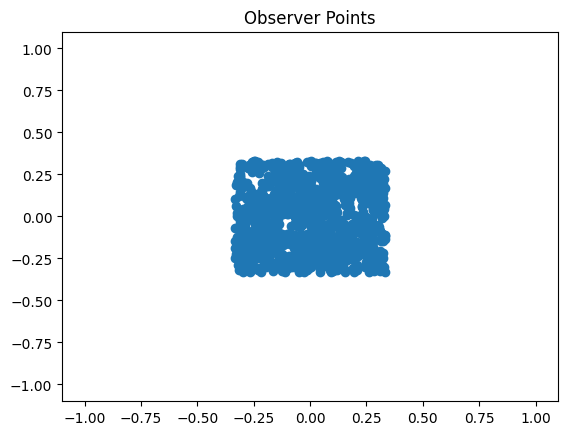

In [30]:
# scatter plot of where the observer dataset resides
plt.scatter(
    df.observers.apply(lambda x: x[0][0]).to_numpy(),  # x value of the observer
    df.observers.apply(lambda x: x[0][1]).to_numpy(),  # y value of the observer
)
# Set custom limits
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.title("Observer Points")
plt.show()

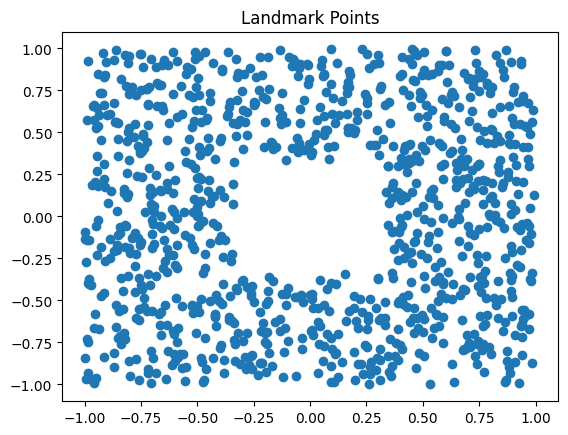

In [31]:
# scatter plot of where the landmark dataset resides
# note that this is only the first landmark in the set.
plt.scatter(
    # note that we are only selecting the first
    df.landmarks.apply(lambda x: x[0][0]).to_numpy(),  # x value of the index [0] landmark of each set/row
    df.landmarks.apply(lambda x: x[0][1]).to_numpy(),  # y value of the index [0] landmark of each set/row
)
# Set custom limits
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.title("Landmark Points")
plt.show()

The above Observere and Landmark data point plots show both the structure of the data and how to access data in a dataframe.  If we breakdown the following:

```python
# extract the x values of the landmarks and put them in a numpy array so
# that the data can be passed to matplotlib for plotting.
df.landmarks.apply(lambda x: x[0][0]).to_numpy()
```

|-- |-- |
|-----|---|
| `df.landmarks`| Access the `landmarks` DataFrame column as a Series object |
| `.apply()`    | Apply the function provided in the parenthesis to every row of the `df.landmarks` Series.  In this case, we are using a lambda in-line function; however, in general you can pass any function which has compatable parameters. |
| `lambda x: x[0][0]` | Create an in-line lambda function which takes the contents of the row of the `df.landmarks` `Series` and then assigns the contents of the row to the parameter x.  Afterwards, the parameter x may be operated on within the lambda function and the result of the evaluation.  If the expression inside `.apply()` was `lambda x: x+1`, this would add 1 to every element in the Series that the `.apply()` was applied to.  In this case, `x[0][0]` means take the contents of the row (i.e. `x`) and treat it like a multi-dimensional array/list, and extract the `[0][0]` element from it and use that as the output of the lambda function which will be used as the contents of the the row for the Series object that is returned by the `.apply()` function. |
| `.to_numpy()` | This is a panda Series object function which converts the data contained in the Series (in this case, the x-value of the landmark), and convert the Series object to a numpy array.  This is convenient since the `matplotlib.pyplot` library (specifically the `plt.scatter()` function) accepts numpy arrays and not Series objects as input parameters. |

### Filtering and Working with Dataframes

In order to view the data, it is often good to be able to filter the data.  With dataframes, you can filter data with boolean expressions by composing a boolean expression with the columns.

In [32]:
# create a test dataframe
df_test = pd.DataFrame({
    "x": [1.1, 2.2, 3.3, 4.4],
    "y": [1, 4, 9, 16],
})
df_test

,x,y
0,1.1,1
1,2.2,4
2,3.3,9
3,4.4,16


In [33]:
# demonstrate output of a boolean expression
df_test.x > 3.0

0    False
1    False
2     True
3     True
Name: x, dtype: bool

In [34]:
# demonstrate another boolean expression
# note requirement of parenthesis since the boolean & has
# higher precidence than the boolean inequality operation.
(df_test.x > 3.) & (df_test.y > 10.)

0    False
1    False
2    False
3     True
dtype: bool

In [35]:
# observe the type of these boolean operations
type(df_test.x > 3.)

pandas.core.series.Series

Now that we know how to create a boolean expression from the contents of a column in a given row and know that the output of these expressions is a Series object, we can use these boolean expressions as a filter on the dataframe to downselect data that we want based upon the content of a given row.  For instance, if we only wanted data in our dataframe where the value of the contents of the column `x > 3` or `x > 3 and y > 10` , then we could do the following.

In [36]:
# filter on rows which meet the specified criteria
df_test[df_test.x > 3.0]

,x,y
2,3.3,9
3,4.4,16


In [37]:
# filter on rows which meet the specified criteria
df_test[(df_test.x > 3.0) & (df_test.y > 10.)]

,x,y
3,4.4,16


Another feature of dataframes is accessing via the `.loc[]` or the `.iloc[]` selectors.  These selectors allow you to access slices of columns and rows of data.  This can be seen with the following examples and a slightly bigger test dataframe.

In [38]:
# create a test dataframe
df_test = pd.DataFrame({
    "w": [1.1, 2.2, 3.3, 4.4],
    "x": [1, 4, 9, 16],
    "y": [2, 8, 18, 32],
    "z": [4, 16, 36, 64],
})
df_test

,w,x,y,z
0,1.1,1,2,4
1,2.2,4,8,16
2,3.3,9,18,36
3,4.4,16,32,64


In [39]:
# select the middle two columns and the middle two rows
# note that .iloc[] selects up to but not including the last numerical
# index listed in the slice.  This behavior is like python list slicing.
df_test.iloc[1:3, 1:3]

,x,y
1,4,8
2,9,18


In [40]:
# select from the last two rows and first two columns
df_test.iloc[-2:,:2]

,w,x
2,3.3,9
3,4.4,16


In [41]:
# select by row and column name using .loc[] instead of .iloc[]
# note that the row selection calls out the indicies that you want to select
# which are inclusive, unlike the selection behavior of .iloc[] as it is
# selecting the actual index values, not a slice of the index.
df_test.loc[1:2, ["x", "y"]]

,x,y
1,4,8
2,9,18


### Basic Stats in the Dataset

Now that we know how to filter a DataFrame based on data contained in its rows, we can inspect the dataset.

First, let use take a look at the error characteristics to see what the spread in the error is like.

Text(0.5, 1.0, 'Observer Triangulation Error Spread: in_sigma_0.125_idx0-999.json')

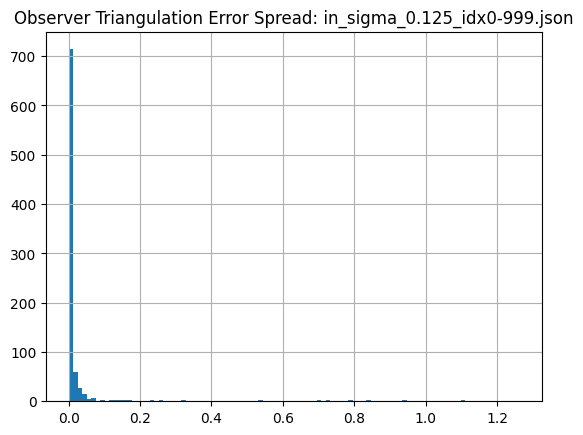

In [42]:
# Create a histogram that shows the spread of the error from this dataset
df.loc[:, "error"].hist(bins=100)
plt.title(f"Observer Triangulation Error Spread: {filename}")

With 80000 datapoints in the dataset, the above plot shows that a large majority of the data points have low error.  This is good.  However, we can not see the structure of the error since it is so imbalanced and there are likely just a few outliers with an error of 10.  To see a bit more structure, lets filter the data and split the histogram into two ranges.

Text(0.5, 1.0, 'Observer Triangulation Error Spread: in_sigma_0.125_idx0-999.json.  Error < 0.5')

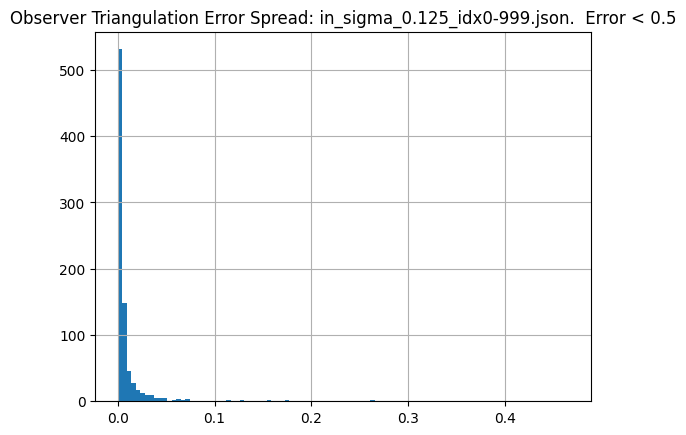

In [43]:
# Create a histogram that shows the spread of the error from this dataset
error_filter_threshold = 0.5
df[df.error < error_filter_threshold].loc[:, "error"].hist(bins=100)
plt.title(f"Observer Triangulation Error Spread: {filename}.  Error < {error_filter_threshold}")

Text(0.5, 1.0, 'Observer Triangulation Error Spread: in_sigma_0.125_idx0-999.json.  Error > 0.5')

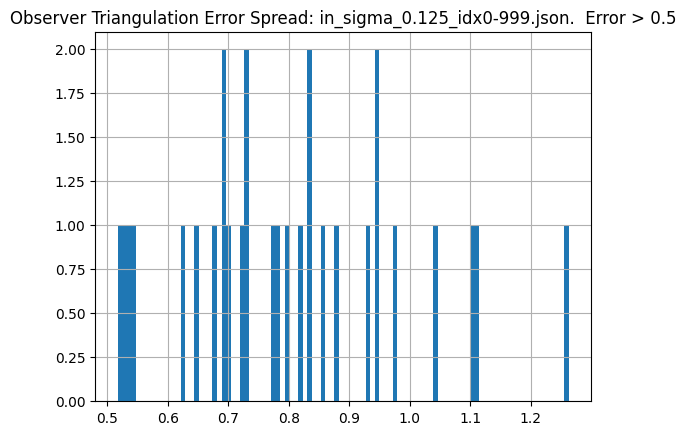

In [44]:
# Create a histogram that shows the spread of the error from this dataset
error_filter_threshold = 0.5
df[df.error > error_filter_threshold].loc[:, "error"].hist(bins=100)
plt.title(f"Observer Triangulation Error Spread: {filename}.  Error > {error_filter_threshold}")

## Error Behaviors

From the above breakdown, we can see that the triangulation algorithm seems to work well; however, we likely would want to understand why the errors occur so that we can possibly place reasonable bounds on the use of the triangulation algorithm such that we do not use it when the expected error is greater than our current needs.

### Low Error Examples

To see what the behavior is like when there is low error, we can filter the dataset on only the low error points and then use the

In [45]:
import random

observers                                     [[0.160173893, -0.25950956340000003], [-0.0108...
landmarks                                     [[-0.6842043201, -0.9330425362], [-0.618289391...
triangulated_point                                                [0.1606225974, -0.2687103892]
error                                                                                  0.009212
centers_with_radii                            {'Pair (1,2)': {'Centers': [[-0.2642869883, 0....
points                                        [-0.9330425362, 0.6842043201, 0.416656057, 0.6...
angles_between_points_ground_truth              [-79.5554850894, -15.0267739665, 94.5822590559]
angles_between_points_with_simulated_error                      [-79.5244672355, -14.899525252]
Name: 257, dtype: object


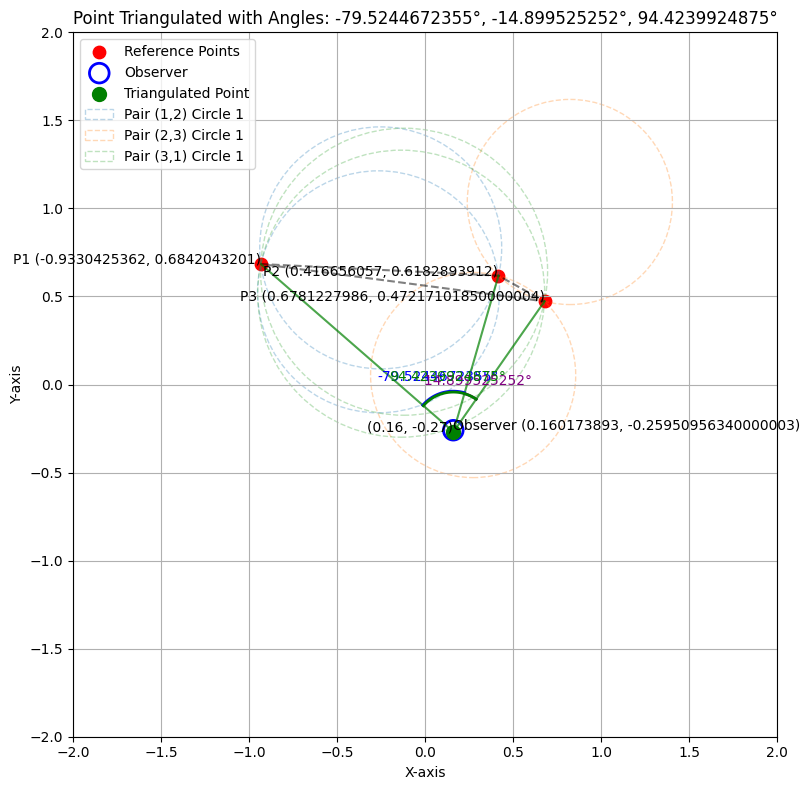

In [46]:
# provide the index of the element within our filtered list
error_filter_threshold = 0.01
df_ = df[
    (df.error > error_filter_threshold * 0.9)
    &
    (df.error < error_filter_threshold * 1.1)
]
idx = random.randint(0,len(df_))

# filter on error threshold
s = df_.iloc[idx,:]

# output what one row looks like for reference purposes
print(s)

# draw the diagram
draw_diagram_s(s)

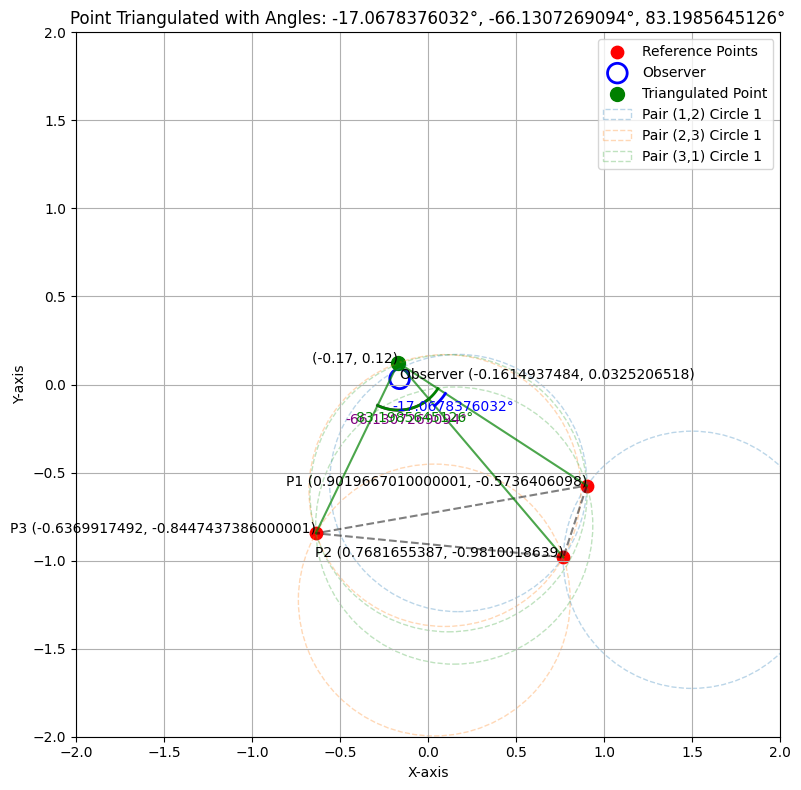

In [47]:
# provide the index of the element within our filtered list
idx = 0
error_filter_threshold = 0.1

# filter on error threshold
s = df[
    (df.error > error_filter_threshold * 0.9)
    &
    (df.error < error_filter_threshold * 1.1)
].iloc[idx,:]

# draw the diagram
draw_diagram_s(s)

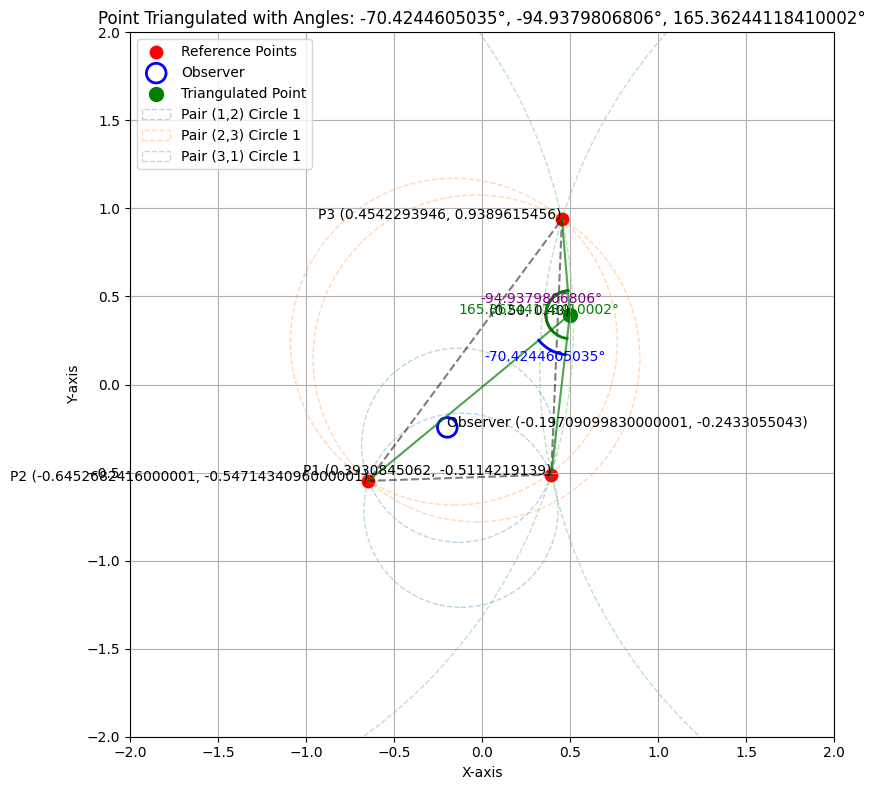

In [48]:
# provide the index of the element within our filtered list
idx = 0
error_filter_threshold = 1.0

# filter on error threshold
s = df[
    (df.error > error_filter_threshold * 0.9)
    &
    (df.error < error_filter_threshold * 1.1)
].iloc[idx,:]

# draw the diagram
draw_diagram_s(s)